In [1]:
from neurodsp import sim, spectral
from neurodsp.utils import create_times
from neurodsp.plts.time_series import plot_time_series
from neurodsp.plts.time_series import plot_instantaneous_measure
from fooof import FOOOF
from bycycle.filt import lowpass_filter
from bycycle.features import compute_features
import random
from scipy.stats import truncnorm
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import pandas as pd
import unicodedata

os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab\Code\distinguish_pac')
import module_pac_functions as pacf

# Increase in PAC papers

Text(0, 0.5, 'publications')

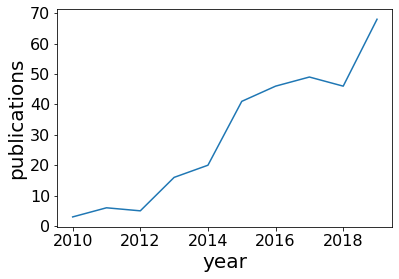

In [33]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
papers = [3, 6, 5, 16, 20, 41, 46, 49, 46, 68]

plt.plot(year,papers)
plt.xlabel('year', size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel('publications', size=20)

# Nonsinusoids causing extreme PAC

In [4]:
# parameters
fs = 1000
freq = 10
n_seconds = 5 # if we are gonna use longer signals, original PSD will be stronger so maybe less brown noise
times = create_times(n_seconds, fs)
plt_time =  [1000,1500]
signal_length = n_seconds * fs

Text(0.5, 19.0, 'Time (s)')

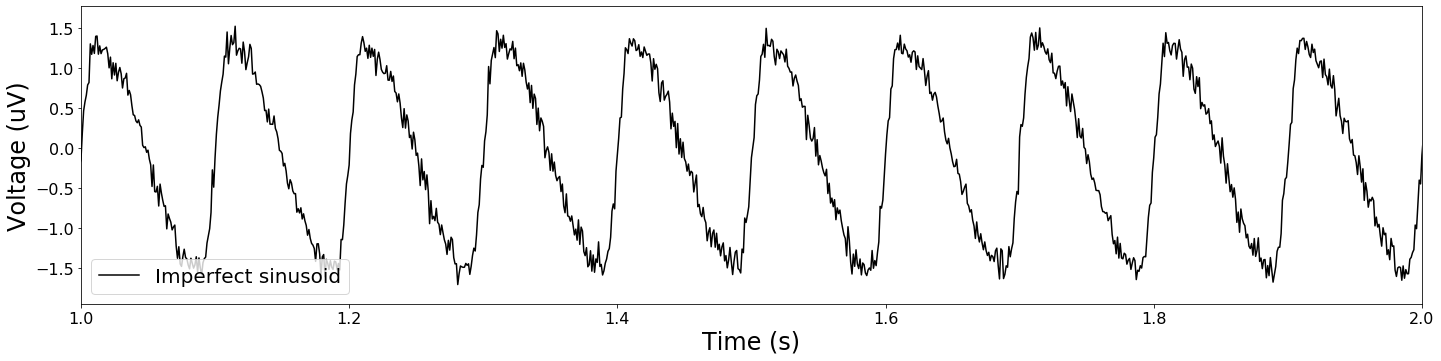

In [37]:
# simulate oscillation
signal = sim.sim_oscillation(n_seconds, fs, freq, cycle='asine', rdsym=.2)

signal = signal + 0.05*np.random.normal(-2, 2, np.shape(signal));

fig, ax = plt.subplots(figsize=(20, 5))
plot_time_series(times, 
                signal,
                xlim=[1,2],
                labels='Imperfect sinusoid', ax=ax)
ax.legend(fontsize=20, loc='lower left')
ax.set_ylabel('Voltage (uV)', size=24)
ax.set_xlabel('Time (s)', size=24)

C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 19.0, 'Time (s)')

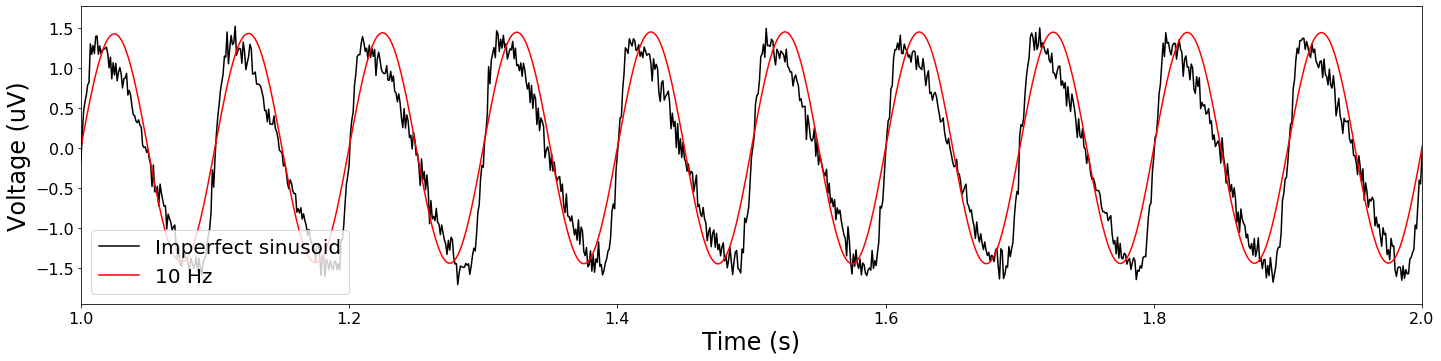

In [40]:
# set range between 4 and 8 Hz, expecting 6 Hz to be central frequency   
phase_providing_band = [9,11]

# use butter bandpass filter to extract this frequency range
phase_data = pacf.butter_bandpass_filter(signal, phase_providing_band[0], phase_providing_band[1], round(float(fs)));

# hilbert transfer data
phase_data_hilbert = hilbert(phase_data);

# calculate the phase of the signal by using angle 
phase_data_angle = np.angle(phase_data_hilbert);

fig, ax = plt.subplots(figsize=(20, 5))
plot_time_series(times, 
                 [signal, phase_data_hilbert],
                 xlim=[1,2],
                 labels=['Imperfect sinusoid', '10 Hz'], ax=ax)
ax.legend(fontsize=20, loc='lower left')
ax.set_ylabel('Voltage (uV)', size=24)
ax.set_xlabel('Time (s)', size=24)


C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 19.0, 'Time (s)')

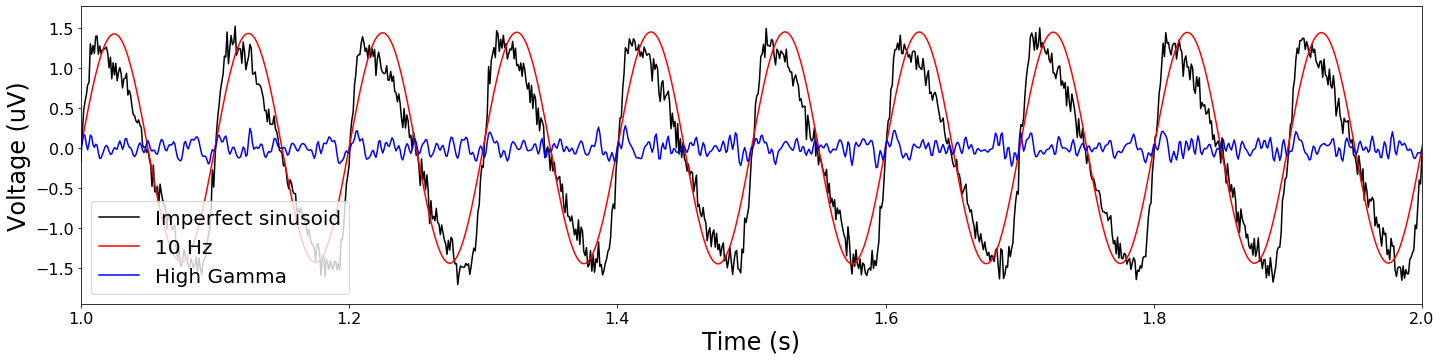

In [42]:
# set range of the band 
amplitude_providing_band = [40,250]

# use butter bandpass filter to extract this frequency range
amp_data = pacf.butter_bandpass_filter(signal, amplitude_providing_band[0], amplitude_providing_band[1], round(float(fs)));

# hilbert transform data
amp_data_hilbert = hilbert(amp_data);

# calculate absolute values
amp_data_abs = abs(amp_data_hilbert);  

fig, ax = plt.subplots(figsize=(20, 5))
plot_time_series(times, 
                 [signal, phase_data_hilbert, amp_data_hilbert],
                 xlim=[1, 2],
                 labels=['Imperfect sinusoid', '10 Hz', 'High Gamma'], ax=ax)
ax.legend(fontsize=20, loc='lower left')
ax.set_ylabel('Voltage (uV)', size=24)
ax.set_xlabel('Time (s)', size=24)

C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jaapv\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 19.0, 'Time (s)')

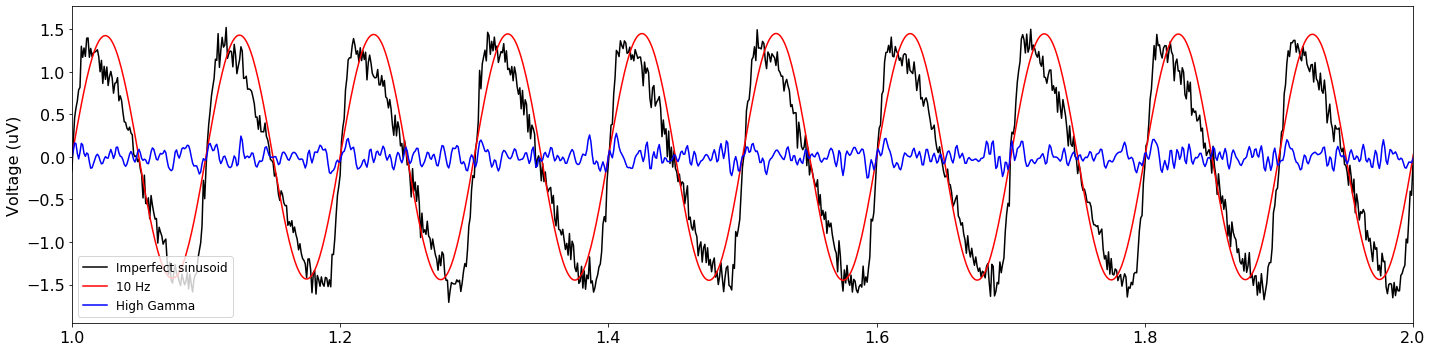

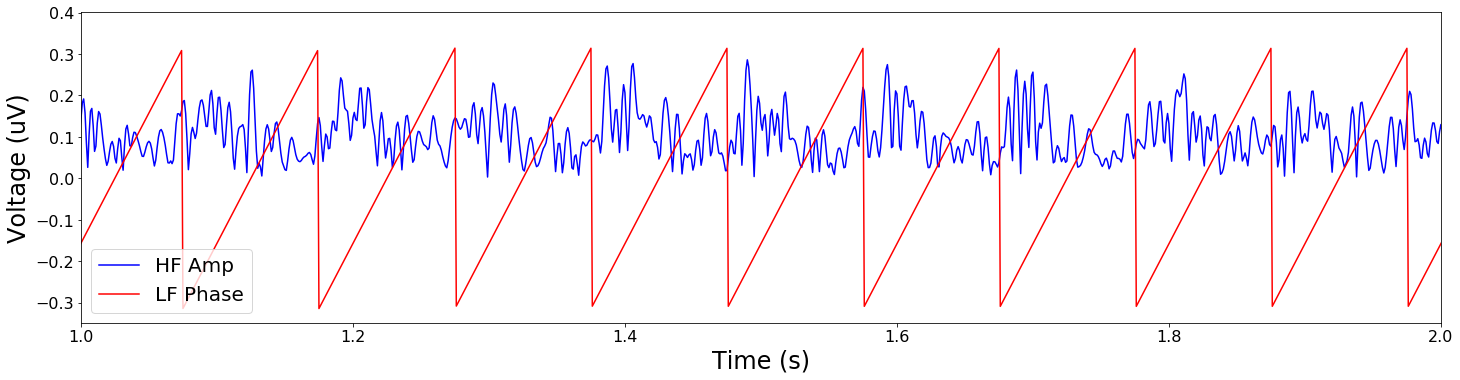

In [43]:
fig, ax = plt.subplots(figsize=(20, 5))

plot_time_series(times, 
                 [signal, phase_data_hilbert, amp_data_hilbert],
                 xlim=[1, 2],
                 labels=['Imperfect sinusoid', '10 Hz', 'High Gamma'],
                 xlabel=None, ax=ax)

fig, ax = plt.subplots(figsize=(20, 5))
plot_time_series(times,
                 [amp_data_abs, (phase_data_angle / 10)],
                 xlim=[1, 2],
                 xlabel=None,
                 colors=['blue', 'red'],
                 labels=['HF Amp', 'LF Phase'],
                 ylabel=None, ax=ax)
ax.legend(fontsize=20, loc='lower left')
ax.set_ylabel('Voltage (uV)', size=24)
ax.set_xlabel('Time (s)', size=24)

# Simulated data distribution

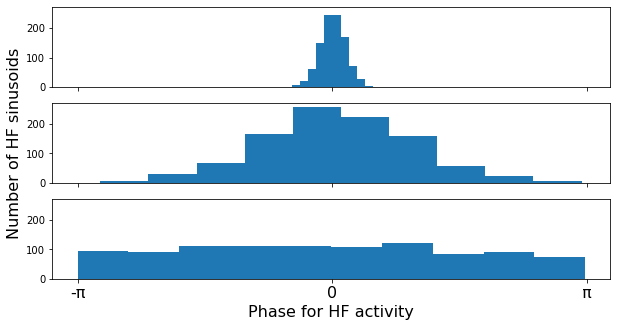

In [82]:
lower, upper = -np.pi, np.pi
mu, sigma = 0, 0.05*np.pi
X = truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

fig, ax = plt.subplots(3, figsize=(10,5), sharex=True, sharey=True)
ax[0].hist(X.rvs(1000))

sigma = .29*np.pi
X = truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
ax[1].hist(X.rvs(1000))

sigma = 1*np.pi
X = truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
ax[2].hist(X.rvs(1000))

plt.xticks([-np.pi, int(0), np.pi],
           ['-'+ unicodedata.lookup("GREEK SMALL LETTER PI"), 0, unicodedata.lookup("GREEK SMALL LETTER PI")],
           size=16)
plt.xlabel('Phase for HF activity', size=16)
ax[1].set_ylabel('Number of HF sinusoids', size=16)
plt.show()

In [66]:
unicodedata.lookup("GREEK SMALL LETTER PI")

I am π
